<center>
    <font color = '#00FFFF'>
        <h1>Tweets Classification</h1>
    </font>
    <font color = '#FFA500'>
        <h3>Natural Language Processing</h3>
    </font>
</center>

# Loading Dependencies

In [81]:
#region Downloading Dataset

# Operating Systemm.
from os import path, environ, listdir, remove

# JSON.
from json import load

# ZIP-File.
from zipfile import ZipFile

# Input-Output.
from io import BytesIO

# Requests.
from requests import get, Session

# Kaggle API.
from kaggle.api.kaggle_api_extended import KaggleApi

#endregion

#region Data Manipulation

# Pandas.
from pandas import read_csv, DataFrame, Series

# Numpy.
from numpy import NAN

# Randomization.
from random import random

# String.
from string import ascii_letters

#endregion

# Regular Expression.
from re import findall

#region Visualization

# Plotly-Express.
from plotly.express import scatter, bar, pie

# Seaborn.
from seaborn import countplot

# Matplot-Library.
from matplotlib.pyplot import figure, title, legend, xlabel, ylabel, show

# Word-Cloud.
from wordcloud import WordCloud

#endregion

#region Natural Language Processing

#region Natural Language Toolkit

# Step-Words.
from nltk.corpus import stopwords

# Tokenization.
from nltk.tokenize import RegexpTokenizer, TweetTokenizer

# Stemming.
from nltk.stem import WordNetLemmatizer, PorterStemmer

#endregion

#endregion

#region Machine Learning Model

#region Torch

#endregion

#endregion

# Data Exploration

## Fetching Dataset

In [4]:
# Loading the dataset from the Kaggle platform using URL -> https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data.

def fetch_dataset() -> DataFrame | None:

    #region Configurations

    # File-Name for storing the credentials.
    api_file_path = 'kaggle.JSON'
    
    # URL for dataset on Kaggle.
    dataset_url = 'jp797498e/twitter-entity-sentiment-analysis'
    
    # Dataset File Name.
    train_dataset_file_path = 'twitter_training.CSV'
    
    #endregion

    # Proceed when the file exists.
    if path.exists(path = api_file_path):
        
        #region Loading the credentials from the file.
        
        # Loading the file for credentials.
        with open(file = api_file_path, mode = 'r') as json_file:

            # Store the file content in JSON format.
            kaggle_api_credentials = load(json_file)
        
        #endregion
        
        #region Storing Credentials in OS Environment
        
        # Storing User-Name.
        environ['KAGGLE_USERNAME'] = kaggle_api_credentials['username']
        
        # Storing API-Key.
        environ['KAGGLE_KEY'] = kaggle_api_credentials['key']
        
        #endregion
    
        #region Fetching Data from Kaggle.

        # Creating an instance for interacting with Kaggle.
        kaggle_api = KaggleApi()
        
        # Authenticate using credentials downloaded.
        kaggle_api.authenticate()
        
        # Downloading the Dataset Files.
        kaggle_api.dataset_download_files(dataset = dataset_url, unzip = True)
        
        #endregion

        # Reading the dataset once downloaded in the local system.
        dataset = read_csv(filepath_or_buffer = train_dataset_file_path)
        
        #region Data Cleaning
        
        #region Dropping Kaggle API Credentials from Operating Systen's Environment
        
        # Dropping the User-Name.
        del environ['KAGGLE_USERNAME']
        
        # Dropping the API-Key.
        del environ['KAGGLE_KEY']
        
        #endregion
        
        #region Removing All CSV Files

        # Iterating over each file in the current working directory.
        for file in listdir():

            # Proceed when found a CSV file.            
            if file.endswith('.csv'):

                # Removing CSV file found in CWD.
                remove(file)
        
        #endregion
        
        #endregion
        
        # Return the stored dataset after the file has been deleted.
        return dataset
    
    else:
        print('Failed to find the file for the API credentials.\nPlease validate the file path and OS restrictions.')
        return None

In [5]:
# Fetching the required dataset from Kaggle.
train_dataset = fetch_dataset()

In [6]:
# First look on the dataset.
train_dataset

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
# Understanding the datatypes and null-values.
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
# Analyzing statistics in data.
train_dataset.describe(include = 'all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


# Data Cleaning

## Fixing Feature Naming Convensions

In [9]:
# Defining proper name for the features.
new_features_name = [
    'Index',
    'Topic',
    'Sentiment',
    'Text'
]

# Changing the names of the features for preventing confusion for future analysis and predictions.
train_dataset.rename(columns = {
                        old_feature_name : new_feature_name for old_feature_name, new_feature_name in zip(list(train_dataset.columns), new_features_name)
                     },
                     inplace = True)

In [10]:
# Validating the renaming operation.
train_dataset.columns

Index(['Index', 'Topic', 'Sentiment', 'Text'], dtype='object')

## Identifying Missing Data

In [11]:
# Listing number of missing values in the dataset.
train_dataset.isna().sum()

Index          0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [12]:
# Identifying the proportion of the data missing.
train_dataset.isna().mean() * 100

Index        0.000000
Topic        0.000000
Sentiment    0.000000
Text         0.918574
dtype: float64

## Identifying Data Duplication

In [13]:
# Identifying number of duplicate records and its average.
train_dataset.duplicated().sum(), train_dataset.duplicated().mean() * 100

(2700, 3.615377405230246)

## Handling Duplicated and Missing Data

In [14]:
# Dropping the duplicate records.
train_dataset.drop_duplicates(inplace = True)

# Dropping the missing values due to its proportion.
train_dataset.dropna(inplace = True)

In [15]:
# Validating the operation on duplicate data.
train_dataset.duplicated().sum()

0

In [16]:
# Validating the operation on missing data.
train_dataset.isna().sum()

Index        0
Topic        0
Sentiment    0
Text         0
dtype: int64

## Analyzing Features

### Categorizing Data

In [17]:
# Plotting bar chart showcasing number of unique columns present in each feature.
bar(data_frame = train_dataset.nunique(),
    title = 'Unique Values in each Column',
    text = 'value')

<h3><font color = '#FFA500'>Observations:</font></h3>

<h4>1. Categorical Variables:</h4>

- Total 32 topics are present which are none other than various games.
- 4 different sentiments exists in the dataset for <b>classification</b>.

<h4>2. Numerical Variables:</h4>

- `Text` will be used for performing the sentiment analysis.

### Storing Columns Name for futher analysis.

In [18]:
# Defining categorization threshold based on value-count for columns.
threshold = 50

# Validating Threshold Value.
train_dataset.nunique() < threshold

Index        False
Topic         True
Sentiment     True
Text         False
dtype: bool

In [19]:
# Categorizing Data based on type.
# 1. Categorical Columns.
categorical_columns = [column for column in train_dataset if train_dataset[column].nunique() < 50]

# 2. Numerical Columns.
numerical_columns = [column for column in train_dataset if column not in categorical_columns]

# Validating Feature Operation.
categorical_columns, numerical_columns

(['Topic', 'Sentiment'], ['Index', 'Text'])

### Analyzing `Topic`

In [20]:
# Plotting a bar chart for understanding the categories of Topics.
bar(data_frame = train_dataset.Topic.value_counts(),
    orientation = 'h',
    width = 2560,
    height = 1600,
    range_x = [2100, 2350],
    text = 'value',
    title = 'Unique Topics with Value-Count',
    labels = {
        'x' : 'Value-Count',
        'y' : 'Topics'
    })

### Analyzing `Sentiment`

In [26]:
# Plotting a bar chart for understanding the categories of Sentiments.
bar(data_frame = round(number = train_dataset.Sentiment.value_counts(normalize = True) * 100, ndigits = 2),
    width = 1280,
    height = 800,
    range_y = [15, 32],
    text = 'value',
    title = 'Proportion of Sentiments',
    labels = {
        'x' : 'Proportion',
        'y' : 'Sentiments'
    })

In [49]:
DataFrame(data)

,Sentiment
Negative,30.28
Positive,27.51
Neutral,24.71
Irrelevant,17.50


In [53]:
# Plotting a bar chart for understanding the categories of Sentiments.

# Preparing Data.
data = round(number = train_dataset.Sentiment.value_counts(normalize = True) * 100, ndigits = 2)

# Showing Chart.
pie(data_frame = data,
    # width = 1280,
    # height = 800,
    labels = data.index,
    values = data.values,
    hole = 0.6,
    title = 'Proportion of Sentiments',
    names = 'Sentiment')

e:\Softwares\Python\Python311\Lib\site-packages\plotly\express\_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### `Topic` with `Sentiment`.

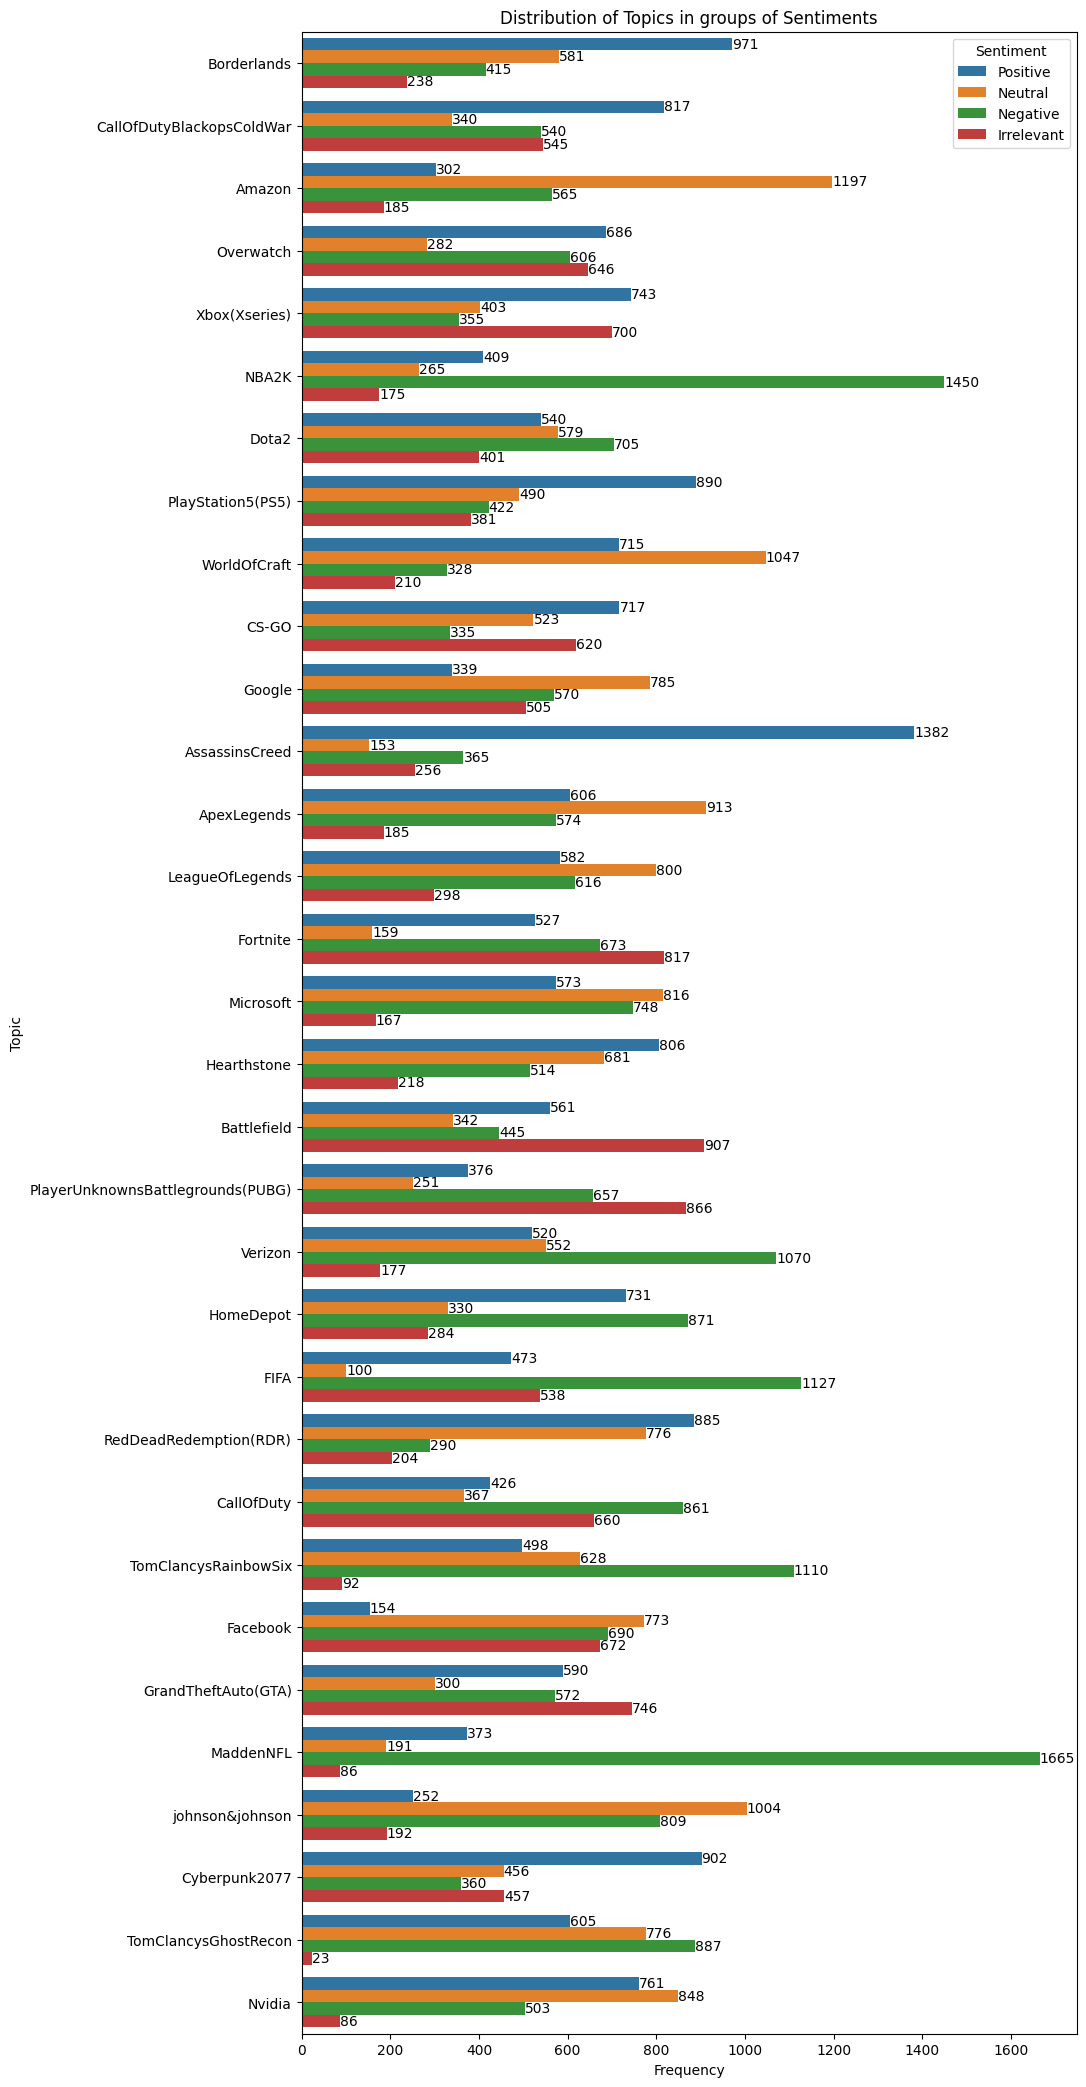

In [97]:
# Plotting Proportion of Sentiments on Topics.

# Chart Resolution: 1000 x 2600p
figure(figsize = (10, 26))

# Plotting chart.
axis = countplot(data = train_dataset,
                 y = 'Topic',
                 hue = 'Sentiment')

# Chart Decoration.
legend(title = 'Sentiment')

xlabel(xlabel = 'Frequency')
ylabel(ylabel = 'Topic')

title(label = 'Distribution of Topics in groups of Sentiments')

# Adding the values on the y-axis.
for patch in axis.patches:
    
    # Embedding Value-Count.
    axis.text(x = patch.get_width(),
              y = patch.get_y() + patch.get_height() / 2,
              s = str(int(patch.get_width())),
              va = 'center')

# Displaying the Chart.
show()

# <center><font color = '#00FFFF'>Future Work</font></center>
- Need to analyze data properly to understand sarcasm in the `Text`.